#Task 1
Understanding dataset

In [ ]:

input_files = {
    "a.txt": "a.txt",
    "us.3k.2k.trms": "us.3k.2k.trms",
    "us.3k.2k.smat": "us.3k.2k.smat"
}

def inspect_file(file_path, file_name):
    # Counters for analysis
    total_lines = 0
    line_length_counts = {}
    sample_lines = []

    print(f"\n{'=' * 30}")
    print(f"Inspecting File: {file_name}")
    print(f"{'=' * 30}")

    try:
        with open(file_path, "r") as f:
            for i, line in enumerate(f, start=1):
                parts = line.strip().split()
                num_parts = len(parts)


                line_length_counts[num_parts] = line_length_counts.get(num_parts, 0) + 1

                # Collect a sample of lines (up to 10)
                if len(sample_lines) < 10:
                    sample_lines.append(line.strip())

                total_lines += 1

        # Display general details
        print(f"\nTotal lines: {total_lines}")
        print("\nLine Length Distribution:")
        for length, count in sorted(line_length_counts.items()):
            print(f"Lines with {length} values: {count}")

        # Display sample lines
        print("\nSample Lines (Max 10):")
        for idx, sample_line in enumerate(sample_lines, start=1):
            print(f"{idx}: {sample_line}")

    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")


for name, path in input_files.items():
    inspect_file(path, name)



Inspecting File: a.txt

Total lines: 2002

Line Length Distribution:
Lines with 0 values: 1
Lines with 3000 values: 2000
Lines with 7407 values: 1

Sample Lines (Max 10):
1: 12a1970 lexmark	2 stacker	21 black jack	2nd mortgage	acapulco hotel	accept account card credit merchant	accept card credit	accept card credit online	accessory computer	accessory desk	accommodation	accommodation hotel	accommodation las vegas	accommodation new york	accommodation orlando	accommodation paris	account card credit merchant	account cost low merchant	account ecommerce merchant	account internet merchant	account merchant	account merchant online	account merchant provider	account merchant service	acid alpha lipoic	acid amino	acid folic	acne medication	acura cl	acyclovir	ad banner	ad personal	add url	address internet	address web	adds personal	adipex	adipex buy	adipex buy online	adipex cheap	adipex diet	adipex diet pill	adipex line	adipex online	adipex online order	adipex online prescription	adipex order	adipex 

Data Preparation

In [ ]:
from collections import defaultdict


a_txt = "a.txt"
trms_file = "us.3k.2k.trms"
smat_file = "us.3k.2k.smat"
output_file = "contextual_transactions.txt"


term_to_firm = defaultdict(list)

with open(trms_file, "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) >= 2:
            term, firm = parts[0], parts[1]
            term_to_firm[firm].append(term)


with open(smat_file, "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 3:
            term, firm, presence = parts
            if presence == "1":
                term_to_firm[firm].append(term)


transactions = defaultdict(set)

for firm, terms in term_to_firm.items():
    transactions[firm].update(terms)


with open(output_file, "w") as f:
    for firm, terms in transactions.items():
        f.write(" ".join(sorted(set(terms))) + "\n")

print(f"Transactions saved to {output_file}")


Total Transactions: 2614
Max Transaction Length: 947
Average Transaction Length: 36.00


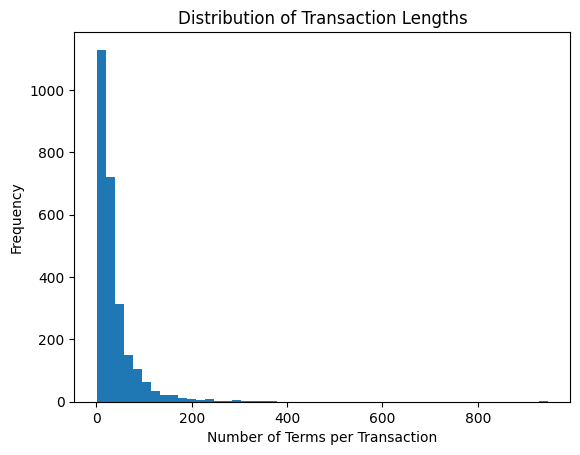

In [ ]:

transactions_file = "contextual_transactions.txt"

transaction_lengths = []

with open(transactions_file, "r") as f:
    for line in f:
        transaction_lengths.append(len(line.strip().split()))

print(f"Total Transactions: {len(transaction_lengths)}")
print(f"Max Transaction Length: {max(transaction_lengths)}")
print(f"Average Transaction Length: {sum(transaction_lengths) / len(transaction_lengths):.2f}")


import matplotlib.pyplot as plt

plt.hist(transaction_lengths, bins=50)
plt.title("Distribution of Transaction Lengths")
plt.xlabel("Number of Terms per Transaction")
plt.ylabel("Frequency")
plt.show()


Task1 D

In [ ]:
def extract_large_itemsets(file_path, min_terms=10):
    large_itemsets = []
    with open(file_path, "r") as f:
        for line in f:
            items = line.split("#")[0].strip().split()
            if len(items) >= min_terms:
                large_itemsets.append(line.strip())
    return large_itemsets[:10]  # Get the first 10 itemsets for brevity


frequent_file = "frequent_itemsets.txt"
closed_file = "closed_itemsets.txt"
maximal_file = "maximal_itemsets.txt"

# Extract itemsets with 10+ terms
frequent_large = extract_large_itemsets(frequent_file, min_terms=10)
closed_large = extract_large_itemsets(closed_file, min_terms=10)
maximal_large = extract_large_itemsets(maximal_file, min_terms=10)


print("\nFrequent Itemsets (10+ terms):")
for itemset in frequent_large:
    print(itemset)

print("\nClosed Itemsets (10+ terms):")
for itemset in closed_large:
    print(itemset)

print("\nMaximal Itemsets (10+ terms):")
for itemset in maximal_large:
    print(itemset)



Frequent Itemsets (10+ terms):
268 322 1119 1121 1305 2171 2201 2207 2241 2243 #SUP: 20
268 322 1121 1132 1305 2171 2201 2207 2241 2243 #SUP: 20
268 322 1119 1121 1132 1305 2171 2207 2241 2243 #SUP: 20
268 322 1119 1132 1305 2171 2201 2207 2241 2243 #SUP: 20
268 322 1119 1121 1132 1305 2201 2207 2241 2243 #SUP: 20
268 1119 1121 1132 1305 2171 2201 2207 2241 2243 #SUP: 20
268 322 1119 1121 1132 1305 2171 2201 2207 2243 #SUP: 20
268 322 1119 1121 1132 2171 2201 2207 2241 2243 #SUP: 20
322 1119 1121 1132 1305 2171 2201 2207 2241 2243 #SUP: 20
268 322 1119 1121 1132 1305 2171 2201 2207 2241 2243 #SUP: 20

Closed Itemsets (10+ terms):
1305 2264 2241 322 146 1119 1132 2208 1117 2207 #SUP: 20
1305 2241 322 146 1121 2201 1119 1132 1117 2207 #SUP: 20
268 1305 2241 322 2171 146 1119 1132 1117 2207 #SUP: 20
268 1305 2241 322 2171 1121 2201 1119 1132 2243 2207 #SUP: 20
1305 2264 2241 322 1812 1121 2201 1119 1132 2208 2207 #SUP: 20
268 1305 2264 2241 322 2171 1119 1132 2208 2207 #SUP: 20
2231 1823

Task1 E

In [ ]:
import random
from collections import Counter


frequent_file = "frequent_itemsets.txt"


def load_frequent_itemsets(file_path, min_terms=5):
    frequent_itemsets = []
    with open(file_path, "r") as f:
        for line in f:
            items = line.split("#")[0].strip().split()
            if len(items) >= min_terms:
                frequent_itemsets.append(items)
    return frequent_itemsets


frequent_itemsets = load_frequent_itemsets(frequent_file, min_terms=5)


def get_most_frequent_terms(itemsets, top_n=10):
    term_counter = Counter()
    for items in itemsets:
        term_counter.update(items)
    return term_counter.most_common(top_n)


most_common_terms = get_most_frequent_terms(frequent_itemsets, top_n=10)

print("\nTop 10 Most Common Terms:")
for term, count in most_common_terms:
    print(f"Term: {term}, Count: {count}")


selected_terms = [term for term, _ in random.sample(most_common_terms, 2)]
print(f"\nSelected Terms for Recommendations: {selected_terms}")


def recommend_items(itemsets, selected_terms, top_n=5):
    recommendations = Counter()
    for items in itemsets:
        if all(term in items for term in selected_terms):
            for item in items:
                if item not in selected_terms:
                    recommendations[item] += 1
    return recommendations.most_common(top_n)


recommendations = recommend_items(frequent_itemsets, selected_terms, top_n=5)


print("\nTop-5 Recommendations:")
if recommendations:
    for item, score in recommendations:
        print(f"Item: {item}, Score: {score}")
else:
    print("No recommendations found for the selected terms.")



Top 10 Most Common Terms:
Term: 1305, Count: 1594986
Term: 268, Count: 1584300
Term: 196, Count: 1555169
Term: 2241, Count: 1528234
Term: 1823, Count: 1524631
Term: 322, Count: 1520913
Term: 1430, Count: 1503269
Term: 2171, Count: 1455042
Term: 2220, Count: 1316412
Term: 2264, Count: 1214783

Selected Terms for Recommendations: ['1430', '322']

Top-5 Recommendations:
Item: 1823, Score: 359109
Item: 196, Score: 359109
Item: 268, Score: 359109
Item: 1305, Score: 358904
Item: 2241, Score: 344790


#Task2

In [38]:
import random


def load_transactions(file_path):
    transactions = []
    with open(file_path, 'r') as f:
        for line in f:
            transaction = set(map(int, line.strip().split()))
            transactions.append(transaction)
    return transactions


def count_transactions_with_terms(transactions, term1, term2):
    count = sum(1 for transaction in transactions if term1 in transaction and term2 in transaction)
    return count


file_path = 'contextual_data.txt'


transactions = load_transactions(file_path)


term1 = 446
term2 = 965


count = count_transactions_with_terms(transactions, term1, term2)

print(f"Total transactions loaded: {len(transactions)}")
print(f"Selected Terms: {term1}, {term2}")
print(f"Number of transactions containing both terms: {count}")


if count >= 35:
    print(f"The terms {term1} and {term2} meet the support threshold of 35.")
else:
    print(f"The terms {term1} and {term2} do NOT meet the support threshold of 35.")


Total transactions loaded: 2000
Selected Terms: 446, 965
Number of transactions containing both terms: 8
The terms 446 and 965 do NOT meet the support threshold of 35.


NOTE: Based on the requirement of a support threshold of 35 transactions, no frequent itemsets or recommendations were found for the selected terms 446 and 965. These terms co-occurred in only 8 transactions, which does not meet the required threshold of 35.

Task 3

Task b
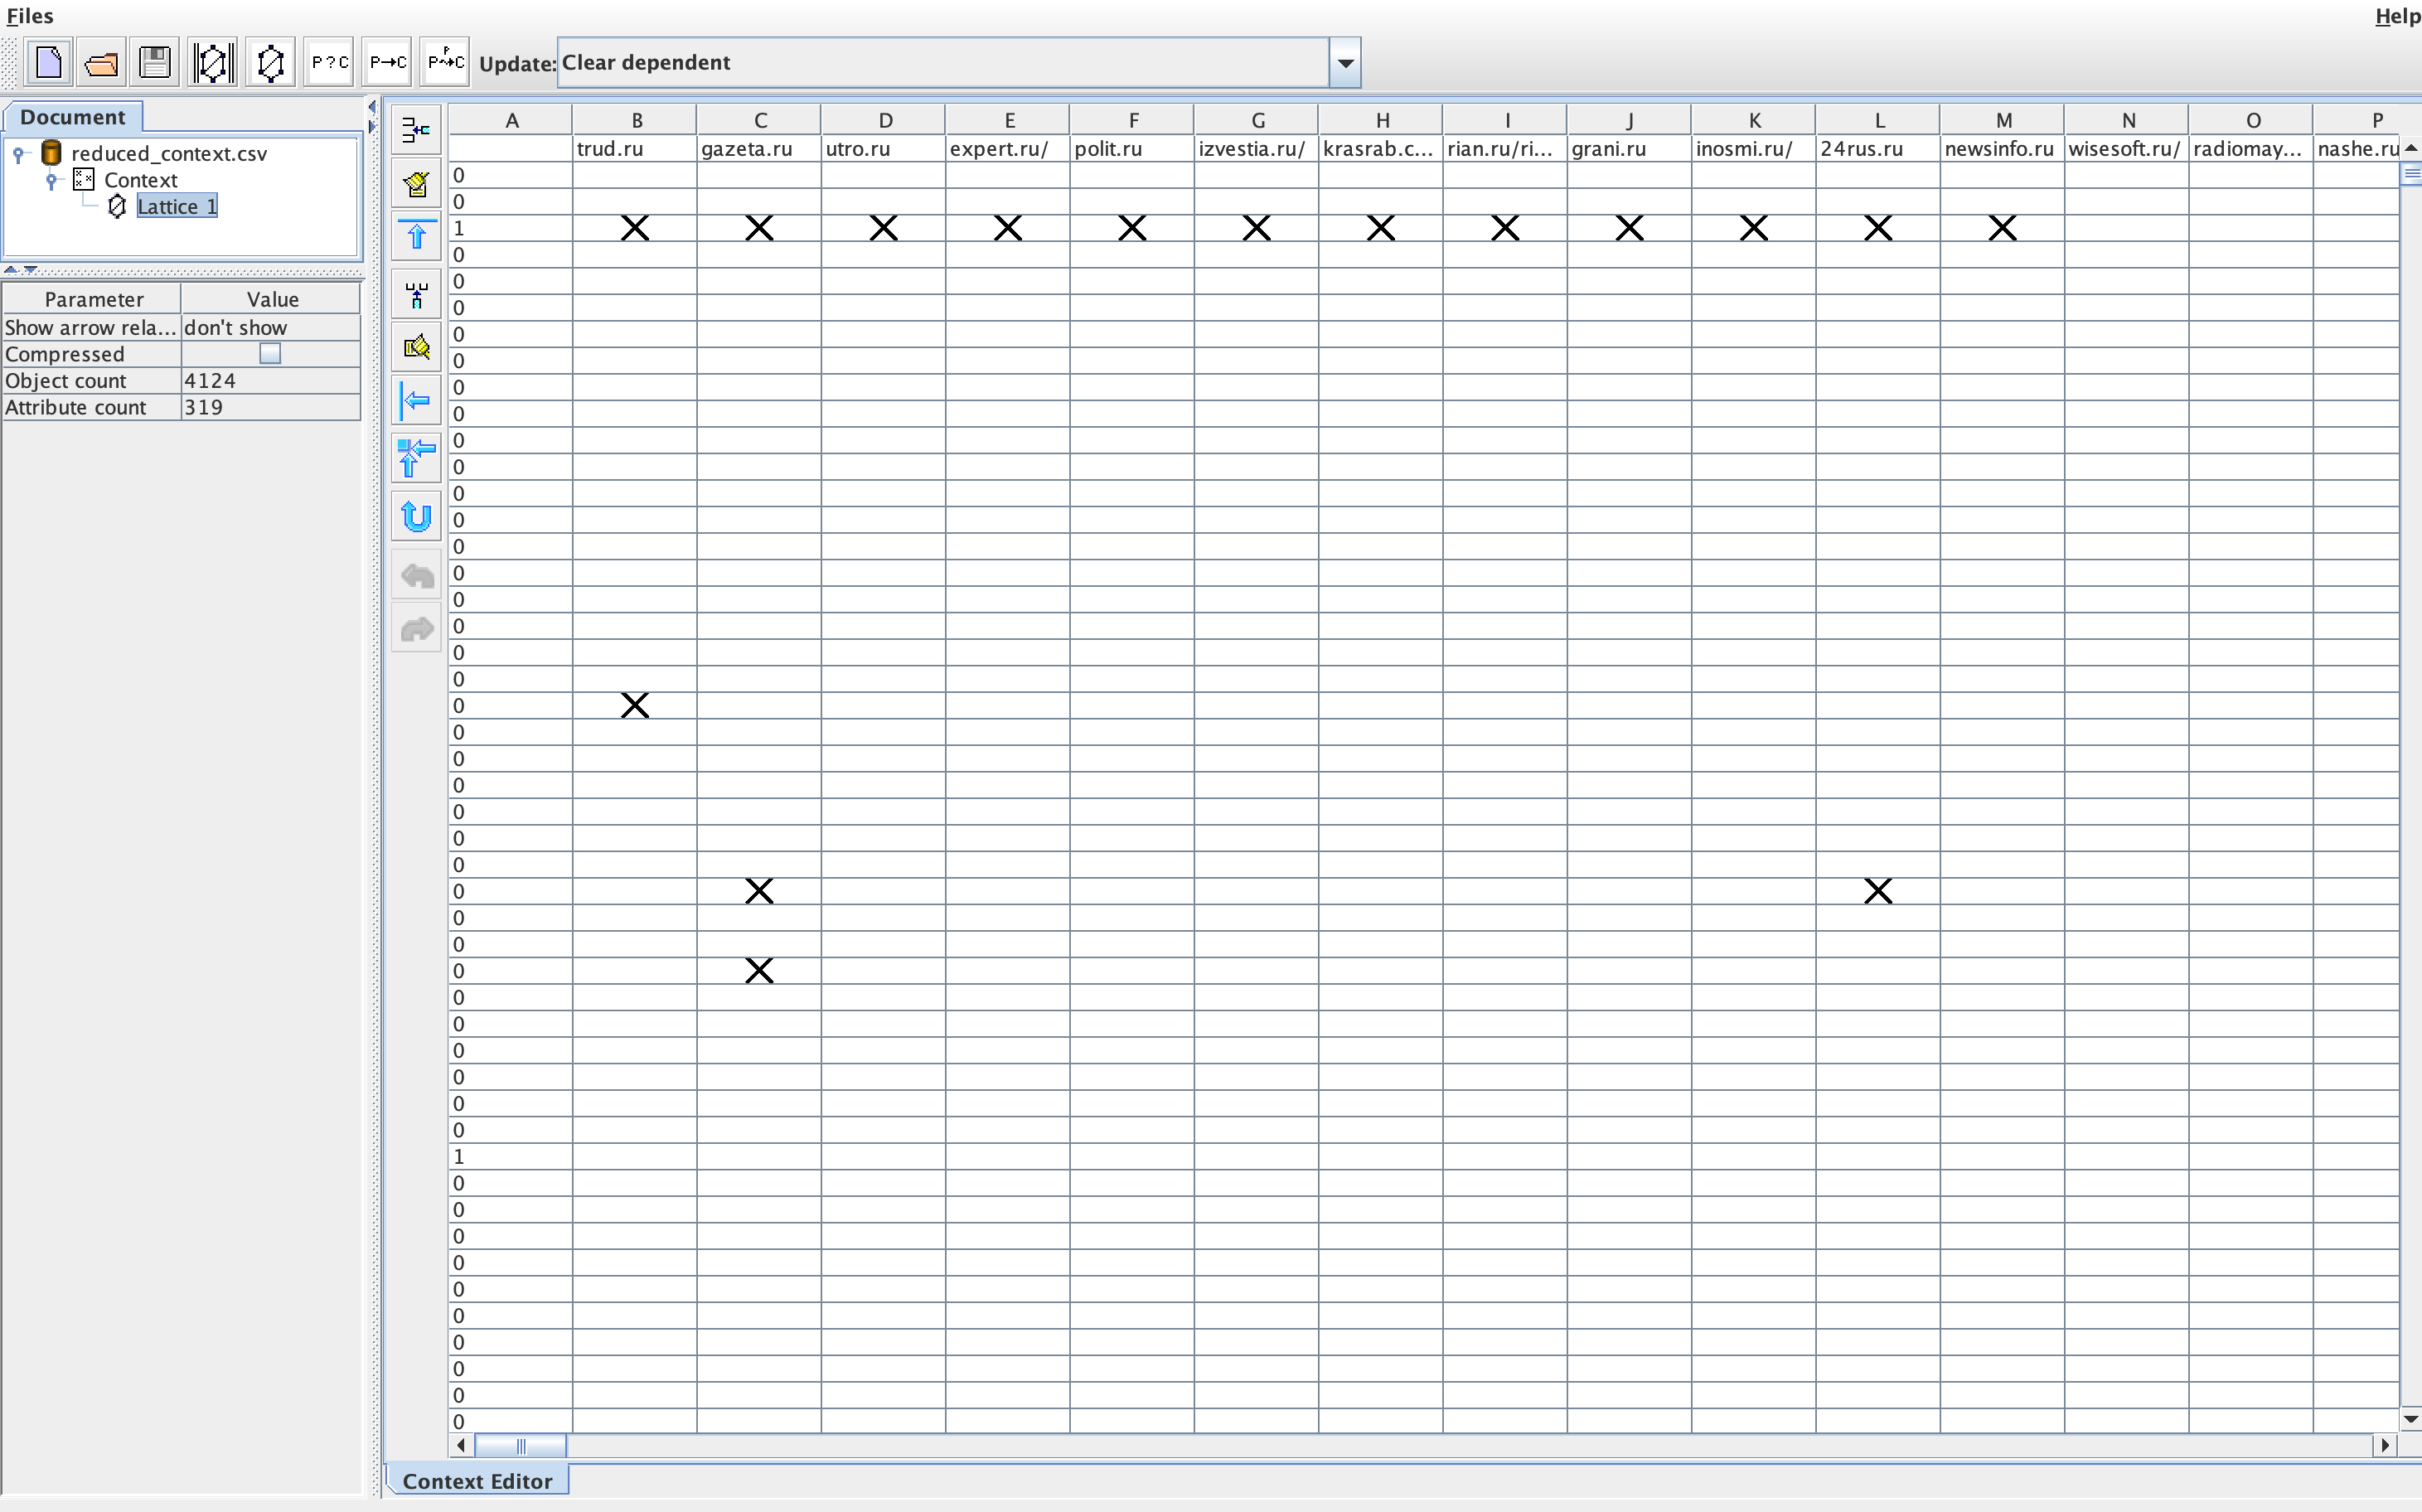